# Support Vector Machines
**SVM**<sub>Support Vector Machine</sub>은 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용 할 수 있는 다목적 머신러닝 모델이다. SVM 모델은 특히 복잡한 분류 문제에 잘 들어 맞으며 작거나 중간 크기의 데이터셋에 적합하다.

## Setup

In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


matplotlib.rc('font', family='AppleGothic')  # MacOS
plt.rcParams['axes.unicode_minus'] = False


## 5.1 Linear SVM 분류
Linear SVM은 Train set을 분류할 수 있는 선형분리를 찾는 것이며, 즉 최적의 Decision Boundary(의사결정 영역)를 찾는다고 할 수 있다.


![large_margin_classification_plot](./images/svm/large_margin_classification_plot.png)

위 그림을 보면 두 클래스가 직선으로 확실히 잘 나뉘어져 있다(**선형적으로 구분이 된다**). 하지만 점선으로 나타난 결정 경계를 만든 모델은 크래스를 적절하게 분류하지 못한다. 두 직선은 결정 경계를 나누지만 새로운 샘플에 대해서는 잘 작동 하지 못할 것이다.  


오른쪽의 그래프는 SVM 분류기의 결정 경계이다. 이 직선은 두 개의 클래스를 잘 나누고 있고, <u>제일 가까운 훈련 샘프로 부터 가능한 멀리 떨어져 있다.</u>   

SVM은 이렇게 가장 폭이 큰 도로를 찾는 것이다. 그래서 이를 **Large Margin Classification**이라고 한다.

도로 바깥쪽에 훈련 샘플을 더 추가해도 결정 경계에는 전혀 영향을 미치지 않는다. 즉, 도로 경계에 위치한 샘플에 의해 전적으로 결정 된다ㅏ. 이런 샘플을 **서포트 벡터**<sub>support vector</sub> 라고 한다(동그라미)

#### 주의
SVM은 스케일 특성에 민감하다. `StandardScaler`을 모델 전에 적용하면 결정경계가 더 좋아진다. 

![sensitivity_to_feature_scales_plot](./images/svm/sensitivity_to_feature_scales_plot.png)

### 5.1.1 소프트 마진 분류
모든 샘플이 도로 바깥쪽에 올바르게 분류 되어 있다면 이를 **Hard Margin Classification**이라고 한다. 

하드 마진 분류의 문제점:
- 데이터가 선형적으로 구분 될 수 있어야 제대로 작동
- 이상치(Outlier)에 민감하다. 



![sensitivity_to_outliers_plot](./images/svm/sensitivity_to_outliers_plot.png)  


위와 같은 문제를 해결하기 위해, **소프트 마진**(Soft Margin) SVM이 개발 되었다. 소프트 마진 SVM은 기본적으로 하드 마진 방법을 기반으로 하는데, 가장 큰 차이점은 Support Vectors가 위치한 경계선에 약간의 **여유 변수**(Slack Variable)을 두는 것이다.

Scikit-Learn의 SVM 모델에서는 이러한 여유 변수를 `C`라는 하이퍼파라미터를 제공한다. `C`는 일종의 **penalty**라고 볼 수 있다.

- `C` 값을 줄이면 오류를 허용하는 정도가 커지며, Margin 또한 커진다.
- `C` 값을 크게하면 오류를 허용하는 정도가 작아지며, Margin 또한 작아진다.


(마진오류): 샘플이 도로 중간이나 심지어 반대 쪽에 있는 경우

사이킷런의 SVM 모델의 하이퍼 파라미터중 `C`를 낮게 설정: 마진 오류 증가, 더 좋은 일반화
![sensitivity_to_outliers_plot](./images/svm/sensitivity_to_outliers_plot.png) 


#### TIP
SVM 모델이 과대 적합이면 `C`를 감소 시켜 모델을 규제 할 수 있다.

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]# 꽃입 길이, 꽃입 너비
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss='hinge', verbose=True))
])
svm_clf.fit(X,y)

[LibLinear]

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', verbose=True))])

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## 5.2 비선형 SVM 분류
실제 데이터셋은 위에서 살펴본 Linear SVM으로 분류할 수 없는 즉, 선형적으로 분류할 수 없는 비선형 적인 데이터셋이 많다. 

이러한, 비선형 데이터셋을 다루는 한 가지 방법은 다항 특성(polynomial features)과 같은 특성을 추가하는 방법이 있다. 

아래의 예제는 $x_1$ 특성에 $x_2 = (x_1)^{2}$ 을 추가하여 2차원의 데이터셋을 만들어 선형분리가 가능하게끔 해준것이다. 

![higher_dimensions_plot](./images/svm/higher_dimensions_plot.png)


Scikit-Learn의 `datasets`에서 `make_moons` 데이터(Scikit-Learn에서 제공하는 두개의 반달 모양 데이터셋)를 이용해 다항 특성을 추가하는 `PolynomialFeatures`와 `StandardScaler` 그리고 `LinearSVC`를 `Pipeline`을 이용해 분류기를 만들면 다음과 같다.

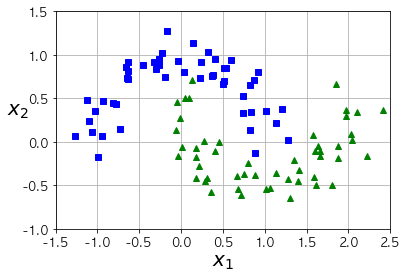

In [7]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

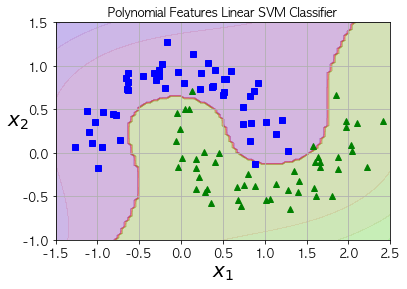

In [13]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('Polynomial Features Linear SVM Classifier')
plt.show()

### 5.2.1 다항식 커널 (Polynomial Kernel)

위에서 처럼 다항식 특성을 추가하는 것은 간단한 방법이지만, 많은 다항식 특성들이 추가되게 되면 모델의 속도가 느려진다. 

SVM에서는 이를 해결하기 위해 **커널 트릭**(kernel trick)을 이용한다. 

$$
K \left( \mathbf{a}, \mathbf{b} \right) = \left( \gamma \mathbf{a}^{T} \cdot \mathbf{b} + r \right)^{d}
$$

아래의 예제 코드는 바로 위의 코드를 kernel trick을 이용해 SVM모델을 만든것이다. Scikit-Learn에서 [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) 클래스에서 커널(kernel)을 사용할 수 있다. `SVC`의 인자 중 `coef0`은 위의 식에서 $r$에 해당하는 부분이다. 

- 커널은 차수가 높아질 수록 $r < 1$ 인 값과 $r > 1$ 인 값의 차이가 크므로 `coef0`을 적절히 조절하면 고차항의 영향을 줄일 수 있다.

In [14]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=0.1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=0.1, kernel='poly'))])

In [15]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=100, C=5))
    ])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, kernel='poly'))])

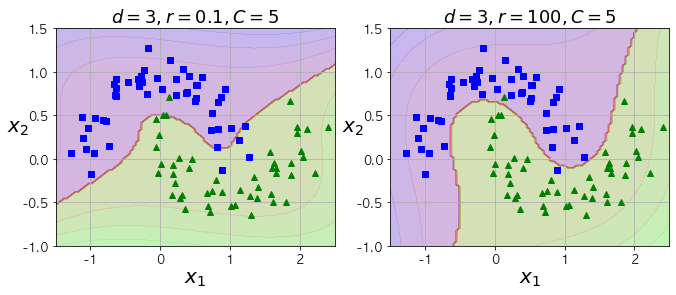

In [16]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=0.1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=100, C=5$", fontsize=18)

plt.show()